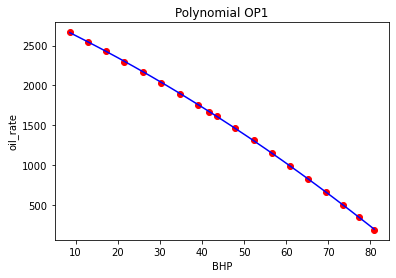

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as lin_reg
from sklearn.preprocessing import PolynomialFeatures

# загружаем данные
df = pd.read_csv ('/Users/marchhelena/Desktop/Python/IPR_point.txt', sep='\t')

# меняем названия колонок
col_names=['well', 'dates', 'BHP', 'oil_rate', 'water_rate','gas_rate', 'mas_oil_rate','mas_gas_rate','PI_oil', 'PI_water','PI_gas']
df.columns = col_names

#преобразуем тип данных
df.iloc[:, 2:10] = df.iloc[:, 2:10].astype(float)

# удаляем выбросы
df = df[df['oil_rate']>=0.9]

# итерируемся по уникальным названиям скважин
wells = df['well'].unique()
for well in wells[0:]:      # менять тут)
    
    df_temp = df[df['well']==well]
    
    X = df_temp['BHP'].values.reshape(-1,1)
    y = df_temp['oil_rate'].values.reshape(-1,1)
    model = lin_reg()
    model.fit(X, y)
    
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X)
    lin_reg2 = lin_reg()
    lin_reg2.fit(X_poly,y)

    X_grid = np.arange(min(X),max(X),0.1)
    X_grid = X_grid.reshape(len(X_grid),1) 
    plt.scatter(X,y, color='red')
    

    plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)),color='blue') 

    plt.title("Polynomial OP1", )
    plt.xlabel('BHP')
    plt.ylabel('oil_rate')
    plt.show()
    break